# 1. Iris Data and KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

### 1.1 Data

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

data = iris.data
target = iris.target

In [3]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
target != 0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [5]:
data.shape

(150, 4)

In [6]:
data = data[target != 0, 2:]
target = target[target != 0]

data.shape

(100, 2)

In [7]:
data = pd.DataFrame(data)
target = pd.DataFrame(target)

~data.duplicated()

0     True
1     True
2     True
3     True
4     True
      ... 
95    True
96    True
97    True
98    True
99    True
Length: 100, dtype: bool

In [8]:
target = target.loc[~data.duplicated()].values.flatten()
data = data.loc[~data.duplicated()].values

data.shape

(80, 2)

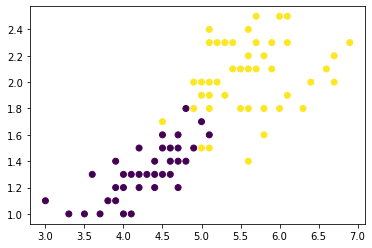

In [9]:
plt.scatter(data[:, 0], data[:, 1], c=target)

### 1.2 Visualization Data

In [10]:
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# 2. K-Value-Based Decision Boundary
- k값에 따른 knn의 결정경계 시각화
- k가 작을수록, 이웃을 적게 사용 할 수록 오버피팅
- k가 클수록, 이웃을 많이 사용할 수록 언더피팅
- k값은 홀수로 지정, 짝수 경우 동점 발생 가능성 있으므로

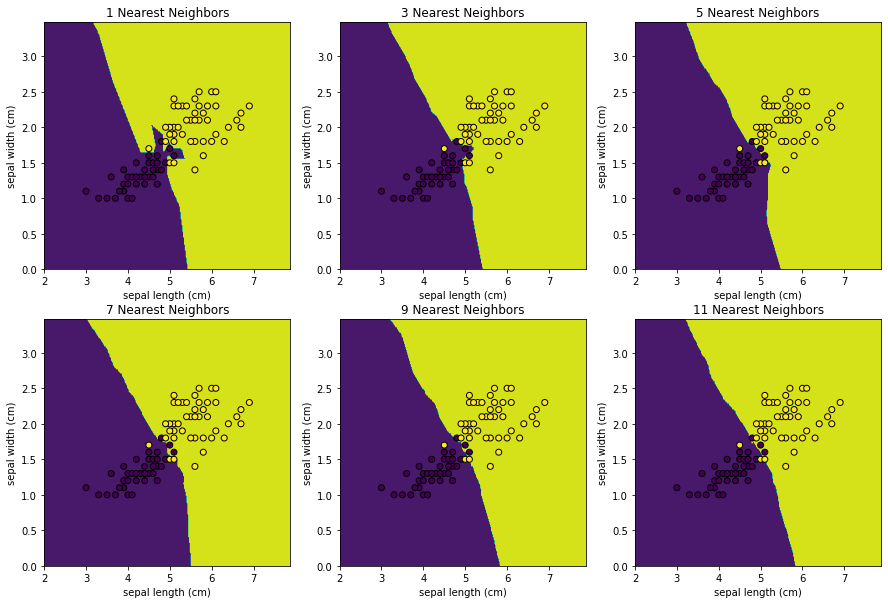

In [11]:
from sklearn.neighbors import KNeighborsClassifier

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for idx, n in enumerate(range(1, 12, 2)):
    # knn 생성 및 학습
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(data, target)

    # 시각회 데이터 예측
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax = axes[idx//3, idx%3]

    # 영역 표시
    ax.contourf(xx, yy, Z)

    # 데이터 표시    
    ax.scatter(
        data[:, 0], data[:, 1], c=target, alpha=1.0, edgecolor="black"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[1])
    ax.set_title(f"{n} Nearest Neighbors")

# 3. My Nearest Neighbor
- KNN 거리 종류는 P를 통해 변경 가능
    - p=1 : 맨해튼 거리 - 한번에 한 축 방향 움직일 수 있을 대 두 점 사이의 거리
    - p=2 : 유클리드 거리 - 두 점 사이 최단거리

### 3.1 Euclidean Distance

In [12]:
train_data, train_target = data[:-1], target[:-1]
test_data = data[-1:]

len(train_data), len(test_data)

(79, 1)

In [13]:
euclid_knn = KNeighborsClassifier(n_neighbors=10)
euclid_knn.fit(train_data, train_target)

KNeighborsClassifier(n_neighbors=10)

In [14]:
euclid_knn.kneighbors(
    test_data, n_neighbors=1, return_distance=False).ravel()

array([37], dtype=int64)

In [15]:
euclid_neighbors_idx = euclid_knn.kneighbors(
    test_data, n_neighbors=10, return_distance=False
).ravel()
euclid_neighbors = train_data[euclid_neighbors_idx]
euclid_neighbors_label = train_target[euclid_neighbors_idx]

test_data

array([[5.1, 1.8]])

In [16]:
euclid_neighbors

array([[5.1, 1.9],
       [5. , 1.9],
       [5. , 1.7],
       [4.9, 1.8],
       [5.1, 2. ],
       [5.1, 1.6],
       [5. , 2. ],
       [5.3, 1.9],
       [5.2, 2. ],
       [4.9, 2. ]])

In [17]:
euclid_neighbors_label

array([2, 2, 1, 2, 2, 1, 2, 2, 2, 2])

In [18]:
euclid_knn.predict(test_data)

array([2])

In [19]:
euclid_knn.predict_proba(test_data)

array([[0.2, 0.8]])

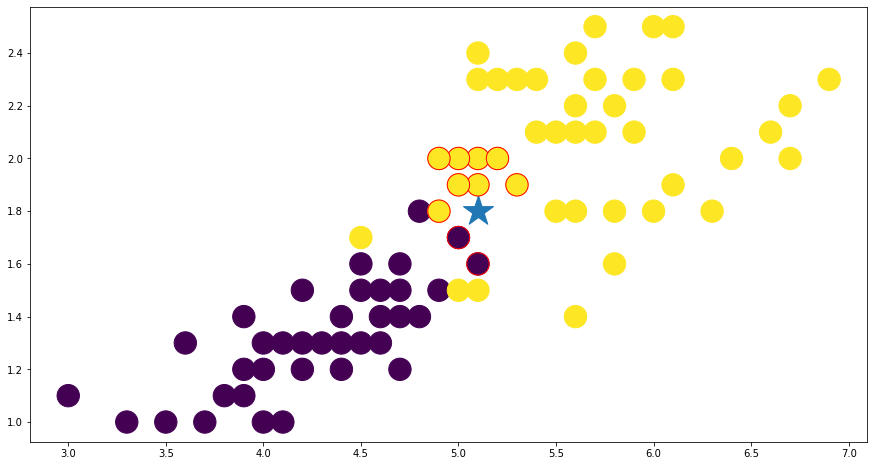

In [20]:
plt.figure(figsize=(15, 8))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_target, s=500)
plt.scatter(test_data[0, 0], test_data[0, 1], marker="*", s=1000)
plt.scatter(euclid_neighbors[:, 0], euclid_neighbors[:, 1], c=euclid_neighbors_label, edgecolors="red", s=500)

### 3.2 Manhattan Distance

In [21]:
manhattan_knn = KNeighborsClassifier(n_neighbors=10, p=1)
manhattan_knn.fit(train_data, train_target)

KNeighborsClassifier(n_neighbors=10, p=1)

In [22]:
manhattan_neighbors_idx = manhattan_knn.kneighbors(
    test_data, n_neighbors=10, return_distance=False
).ravel()
manhattan_neighbors = train_data[manhattan_neighbors_idx]
manhattan_neighbors_label = train_target[manhattan_neighbors_idx]

manhattan_neighbors

array([[5.1, 1.9],
       [4.9, 1.8],
       [5. , 1.9],
       [5. , 1.7],
       [5.1, 2. ],
       [5.1, 1.6],
       [5. , 2. ],
       [4.8, 1.8],
       [5.3, 1.9],
       [5.1, 1.5]])

In [23]:
manhattan_neighbors_label

array([2, 2, 2, 1, 2, 1, 2, 1, 2, 2])

In [24]:
manhattan_knn.predict_proba(test_data)

array([[0.3, 0.7]])

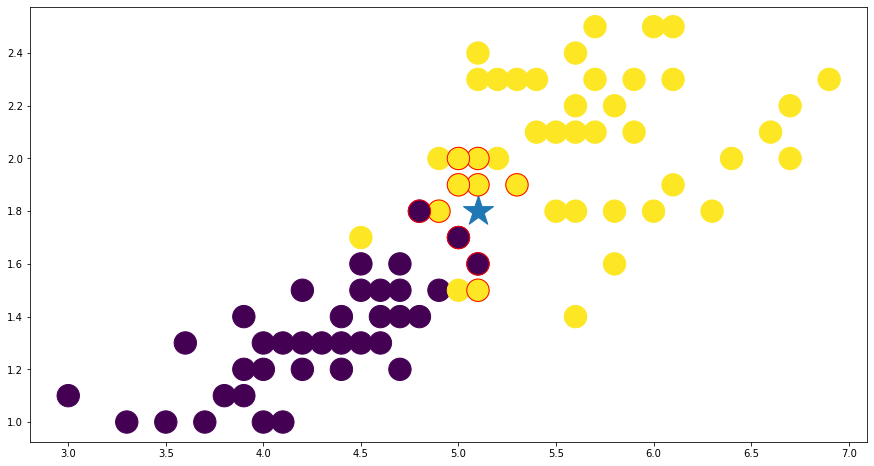

In [25]:
plt.figure(figsize=(15, 8))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_target, s=500)
plt.scatter(test_data[0, 0], test_data[0, 1], marker="*", s=1000)
plt.scatter(manhattan_neighbors[:, 0], manhattan_neighbors[:, 1], c=manhattan_neighbors_label, edgecolors="red", s=500)

### 3.3  compare

In [26]:
print('유클리드 거리 : ', euclid_neighbors_idx)
print('맨해튼 거리 : ', manhattan_neighbors_idx)

유클리드 거리 :  [37 76 21 59 46 25 49 47 77 57]
맨해튼 거리 :  [37 59 76 21 46 25 49 17 47 67]


In [27]:
print('유클리드 - 맨해튼 : ', set(euclid_neighbors_idx) - set(manhattan_neighbors_idx))
print('맨해튼 - 유클리드 : ', set(manhattan_neighbors_idx) - set(euclid_neighbors_idx))

유클리드 - 맨해튼 :  {57, 77}
맨해튼 - 유클리드 :  {17, 67}


In [28]:
diff_neighbors_idx = list(set(euclid_neighbors_idx) - set(manhattan_neighbors_idx))
diff_neighbors_idx.extend(list(set(manhattan_neighbors_idx) - set(euclid_neighbors_idx)))
diff_neighbors_idx

[57, 77, 17, 67]

In [29]:
diff_neighbors = train_data[diff_neighbors_idx]
diff_neighbors_label = train_target[diff_neighbors_idx]

same_neighbors_idx = list(set(euclid_neighbors_idx) & set(manhattan_neighbors_idx))
same_neighbors_idx

[37, 76, 46, 47, 49, 21, 25, 59]

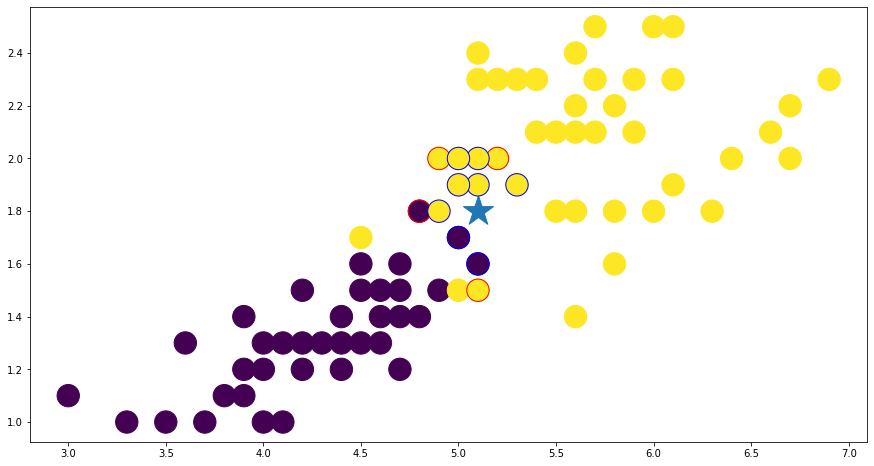

In [30]:
same_neighbors = train_data[same_neighbors_idx]
same_neighbors_label = train_target[same_neighbors_idx]

plt.figure(figsize=(15, 8))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_target, s=500)
plt.scatter(test_data[0, 0], test_data[0, 1], marker="*", s=1000)
plt.scatter(diff_neighbors[:, 0], diff_neighbors[:, 1], c=diff_neighbors_label, edgecolors="red", s=500)
plt.scatter(same_neighbors[:, 0], same_neighbors[:, 1], c=same_neighbors_label, edgecolors="blue", s=500)

# 4. Summary
- K-Nearest Neighbors 장점
    - 학습 과정이 없다
    - 결과 이해 하기 쉽다
- K-Nearest Neighbors 단점
    - 데이터 많을수록 시간 오래 걸린다
    - 지나치게 데이터에 의존적
- K-Nearest Neightbors 거리의 종류
    - 1. 유클리드 거리(Euclidean Distance) : 두 점 사이 거리 계산할 때 흔히 사용, 두 점 사이의 최단 거리 의미
    - 2. 맨해튼 거리(Manhattan Distance) : 한번에 한축 방향 움직일 수 있을 때 두점 사이의 거리